# Preeliminary thoughts

During the data-gathering phase, my partner and I met to explore the dataset and tried to assess what would end up being our goal, the target variable for our prediction, and what the features were about.

The first impression we had about the dataset was that it was really dirty. We could see that more than 50% of the values were missing even removing duplicates. Also, we saw a lot of unnecessary columns showing redundant information.

Based on the information we thought we had, we decided to go for the suggested goal of the project which is to try to predict if a shark attack would or not be fatal. That results in a classification problem that we would resolve by implementing a logistic regression model.

We also considered potentially reducing the scope of the prediction to only a main geographic location if the model behavior didn't perform correctly, but we left this possibility open for later phases of the project. 

With a goal in mind, I took the role of project manager to design a scope of work using a shared notion space. I divided the project into steps like a Gantt diagram and assigned a period for each keeping in mind that the data cleaning and the group improving of the model would be the more time-consuming tasks.

![WhatsApp Image 2023-12-21 at 13.28.08.jpeg](<attachment:WhatsApp Image 2023-12-21 at 13.28.08.jpeg>)

All being said, we started loading and cleaning the data.

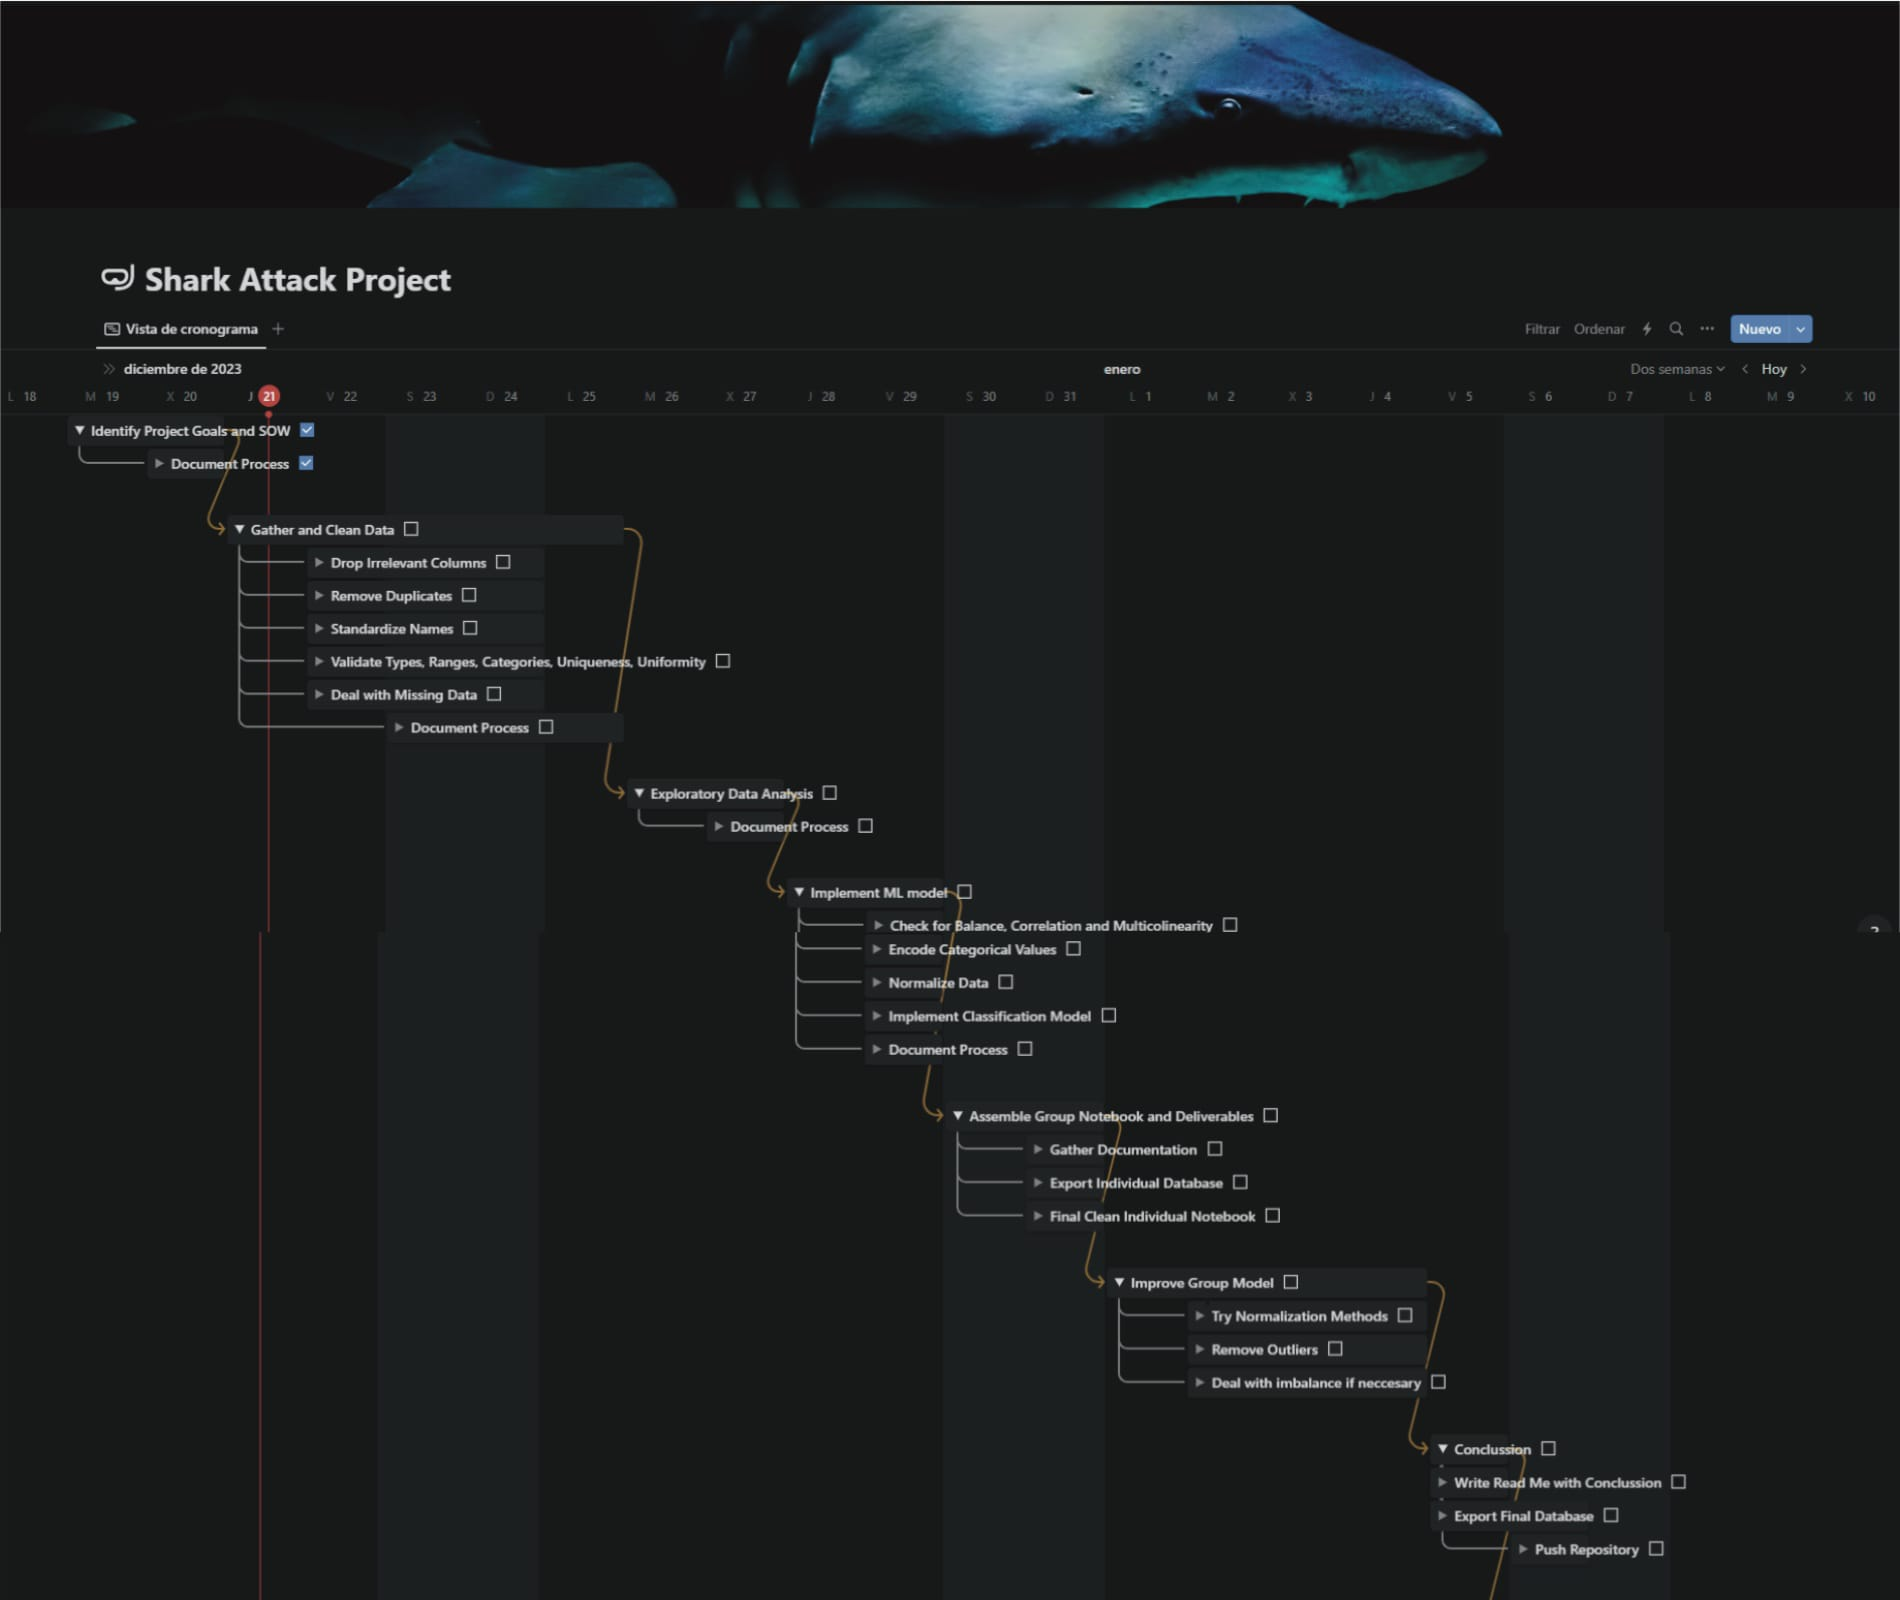

### Imports and settings

In [1]:
import pandas as pd  
from pandas import options
import numpy as np 
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Data Cleaning

## Data gathering

In [3]:
df = pd.read_csv(r"c:\Users\USUARIO\Desktop\Data Analysis\Ironhack\Mini-Proyecto\Database\attacks.csv", encoding= "latin1")
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Dropping unnecesary columns, removing duplicates and standardazing column names and values

First of all, to facilitate referring to the columns and values I'm going to standardize their names. I will drop some columns in the process since some of them are redundant or filled with unnecessary data. For the moment I'm keeping the following columns: date, year, type, country, area, location, activity, sex, age, injury, time, species, and of course the target variable, fatal_(y/n). 

Later in the validation phase, i will explain why I'm keeping each of these columns and why i will drop some of them during the project.

In [4]:
# Standardizing column names

df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns 

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [5]:
# Dropping unnecessary columns

unnecessary_columns = ["case_number", "unnamed:_22", "unnamed:_23", "case_number.2", "case_number.1", "href", "href_formula", "pdf", "original_order", "investigator_or_source", "name"]
df = df.drop(columns= unnecessary_columns )
df.head()

,date,year,type,country,area,location,activity,sex_,age,injury,fatal_(y/n),time,species_
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [6]:
# Standardizing value names

df["country"] = df["country"].str.lower().str.replace(" ", "_")
df["area"] = df["area"].str.lower().str.replace(" ", "_")
df["location"] = df["location"].str.lower().str.replace(" ", "_")
df["activity"] = df["activity"].str.lower().str.replace(" ", "_")
df["injury"] = df["injury"].str.lower().str.replace(" ", "_")
df["species_"] = df["species_"].str.lower().str.replace(" ", "_")
df.head()

,date,year,type,country,area,location,activity,sex_,age,injury,fatal_(y/n),time,species_
0,25-Jun-2018,2018.0,Boating,usa,california,"oceanside,_san_diego_county",paddling,F,57,"no_injury_to_occupant,_outrigger_canoe_and_pad...",N,18h00,white_shark
1,18-Jun-2018,2018.0,Unprovoked,usa,georgia,"st._simon_island,_glynn_county",standing,F,11,minor_injury_to_left_thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,usa,hawaii,"habush,_oahu",surfing,M,48,injury_to_left_lower_leg_from_surfboard_skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,australia,new_south_wales,arrawarra_headland,surfing,M,NaN,minor_injury_to_lower_leg,N,NaN,2_m_shark
4,04-Jun-2018,2018.0,Provoked,mexico,colima,la_ticla,free_diving,M,NaN,lacerations_to_leg_&_hand_shark_provoked_incident,N,NaN,"tiger_shark,_3m"


In [7]:
# Renaming correctly some columns and arranging them in the selected order

df = df[["date", "year", "country", "area", "location", "age", "sex_", "type", "activity", "time", "injury", "species_", "fatal_(y/n)"]]
df = df.rename(columns={"sex_":"sex", "species_":"specie"})
df.head()

,date,year,country,area,location,age,sex,type,activity,time,injury,specie,fatal_(y/n)
0,25-Jun-2018,2018.0,usa,california,"oceanside,_san_diego_county",57,F,Boating,paddling,18h00,"no_injury_to_occupant,_outrigger_canoe_and_pad...",white_shark,N
1,18-Jun-2018,2018.0,usa,georgia,"st._simon_island,_glynn_county",11,F,Unprovoked,standing,14h00 -15h00,minor_injury_to_left_thigh,NaN,N
2,09-Jun-2018,2018.0,usa,hawaii,"habush,_oahu",48,M,Invalid,surfing,07h45,injury_to_left_lower_leg_from_surfboard_skeg,NaN,N
3,08-Jun-2018,2018.0,australia,new_south_wales,arrawarra_headland,NaN,M,Unprovoked,surfing,NaN,minor_injury_to_lower_leg,2_m_shark,N
4,04-Jun-2018,2018.0,mexico,colima,la_ticla,NaN,M,Provoked,free_diving,NaN,lacerations_to_leg_&_hand_shark_provoked_incident,"tiger_shark,_3m",N


In [8]:
# Dropping duplicates

df[df.duplicated()]
df = df.drop_duplicates()
df.head()

,date,year,country,area,location,age,sex,type,activity,time,injury,specie,fatal_(y/n)
0,25-Jun-2018,2018.0,usa,california,"oceanside,_san_diego_county",57,F,Boating,paddling,18h00,"no_injury_to_occupant,_outrigger_canoe_and_pad...",white_shark,N
1,18-Jun-2018,2018.0,usa,georgia,"st._simon_island,_glynn_county",11,F,Unprovoked,standing,14h00 -15h00,minor_injury_to_left_thigh,NaN,N
2,09-Jun-2018,2018.0,usa,hawaii,"habush,_oahu",48,M,Invalid,surfing,07h45,injury_to_left_lower_leg_from_surfboard_skeg,NaN,N
3,08-Jun-2018,2018.0,australia,new_south_wales,arrawarra_headland,NaN,M,Unprovoked,surfing,NaN,minor_injury_to_lower_leg,2_m_shark,N
4,04-Jun-2018,2018.0,mexico,colima,la_ticla,NaN,M,Provoked,free_diving,NaN,lacerations_to_leg_&_hand_shark_provoked_incident,"tiger_shark,_3m",N


In [9]:
df.isna().sum()
df = df.drop(index=6302)
df.head()

,date,year,country,area,location,age,sex,type,activity,time,injury,specie,fatal_(y/n)
0,25-Jun-2018,2018.0,usa,california,"oceanside,_san_diego_county",57,F,Boating,paddling,18h00,"no_injury_to_occupant,_outrigger_canoe_and_pad...",white_shark,N
1,18-Jun-2018,2018.0,usa,georgia,"st._simon_island,_glynn_county",11,F,Unprovoked,standing,14h00 -15h00,minor_injury_to_left_thigh,NaN,N
2,09-Jun-2018,2018.0,usa,hawaii,"habush,_oahu",48,M,Invalid,surfing,07h45,injury_to_left_lower_leg_from_surfboard_skeg,NaN,N
3,08-Jun-2018,2018.0,australia,new_south_wales,arrawarra_headland,NaN,M,Unprovoked,surfing,NaN,minor_injury_to_lower_leg,2_m_shark,N
4,04-Jun-2018,2018.0,mexico,colima,la_ticla,NaN,M,Provoked,free_diving,NaN,lacerations_to_leg_&_hand_shark_provoked_incident,"tiger_shark,_3m",N


## Dealing with missing data and validating types, ranges, categories, uniqueness and uniformity

### fatal_(y/n)

This will be our target variable. We need its values to be classified into two types, being those types “yes” and “no”.

To achieve this, after we check there are some values outside this range, we define a function to classify them based on their starting letter. All values that don't start either with “y” or “n” will be added to the “no” category since it’s the statistical mode. 

In the end, I will drop nans from the target variable since I find this data important to be accurate and not an imputation.

In [10]:
# Always before I change the dataset I will be making copies

data1 = df.copy()

In [11]:
# Checking for values

data1["fatal_(y/n)"].value_counts()

fatal_(y/n)
N          4291
Y          1384
UNKNOWN      70
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64

In [12]:
#Defining a function to classify values

def clean_fatal(x):
    x = str(x)
    if x.lower().startswith("n"):
        return "n"
    elif x.lower().startswith("y"):
        return "y"
    else:
        return "n"

In [13]:
# Dropping Nans from target variable and applying function

data1 = data1[data1["fatal_(y/n)"].notna()]
data1["fatal_(y/n)"] = data1["fatal_(y/n)"].apply(clean_fatal)
data1["fatal_(y/n)"].value_counts()

fatal_(y/n)
n    4371
y    1385
Name: count, dtype: int64

### sex

I found the genre variable important to keep because of two main reasons: 

- Historically, men are more prone to risk 
- Differences in physiology could influence the potential lethality of a shark attack

For this variable, I followed the same steps shown earlier. Those values that don’t start either by “m” or “f” will be added to “m”. 


In [14]:
# Cheking the values

data1["sex"].value_counts()

sex
M      4684
F       579
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

In [15]:
# Defining the function

def clean_sex(x):
    x = str(x)
    if x.lower().startswith("m"):
        return "male"
    elif x.lower().startswith("f"):
        return "female"
    else:
        return "male"

In [16]:
# Applying the function

data1["sex"]= data1["sex"].apply(clean_sex)
data1.head()

,date,year,country,area,location,age,sex,type,activity,time,injury,specie,fatal_(y/n)
0,25-Jun-2018,2018.0,usa,california,"oceanside,_san_diego_county",57,female,Boating,paddling,18h00,"no_injury_to_occupant,_outrigger_canoe_and_pad...",white_shark,n
1,18-Jun-2018,2018.0,usa,georgia,"st._simon_island,_glynn_county",11,female,Unprovoked,standing,14h00 -15h00,minor_injury_to_left_thigh,NaN,n
2,09-Jun-2018,2018.0,usa,hawaii,"habush,_oahu",48,male,Invalid,surfing,07h45,injury_to_left_lower_leg_from_surfboard_skeg,NaN,n
3,08-Jun-2018,2018.0,australia,new_south_wales,arrawarra_headland,NaN,male,Unprovoked,surfing,NaN,minor_injury_to_lower_leg,2_m_shark,n
4,04-Jun-2018,2018.0,mexico,colima,la_ticla,NaN,male,Provoked,free_diving,NaN,lacerations_to_leg_&_hand_shark_provoked_incident,"tiger_shark,_3m",n


In [17]:
data2 = data1.copy()

### year

Even though I didn’t think that the year variable would highly correlate with the lethality I decided to include it to see how it behaves. The relationship would not be straightforward or directly linked, however, over a longer period, certain trends or patterns might emerge due to changes in human activities, conservation efforts, and advancements in medical treatments.

I tried to rescue some of the empty values from the date column using regular expressions to match digits. Then I filled the missing values with the mode.

Since there will  be a lot of missing values if I try to extract the months from the date column and I don't find that variable to be useful, I will drop the date column.


In [18]:
# Defining the regular expressions function

def extract_years(x):
    years = re.findall(r'\b\d{3,4}\b', x)
    return years

In [19]:
# Applying the function to the date column to extract the digits and filling missing values in the year columns

empty_years = data2[(data2["year"] == 0) & (data2["date"].notna())]
years = empty_years["date"].apply(extract_years)
empty_years["year"] = years
empty_years.head()

,date,year,country,area,location,age,sex,type,activity,time,injury,specie,fatal_(y/n)
6177,Ca. 214 B.C.,[214],NaN,ionian_sea,NaN,NaN,male,Unprovoked,ascending_from_a_dive,NaN,"fatal,_shark/s_bit_him_in_two",NaN,y
6178,Ca. 336.B.C..,[336],greece,piraeus,in_the_haven_of_cantharus,NaN,male,Unprovoked,washing_his_pig_in_preparation_for_a_religious...,NaN,"fatal,_shark_""bit_off_all_lower_parts_of_him_u...",NaN,y
6179,493 B.C.,[493],greece,off_thessaly,NaN,NaN,male,Sea Disaster,shipwrecked_persian_fleet,NaN,herodotus_tells_of_sharks_attacking_men_in_the...,NaN,y
6180,Ca. 725 B.C.,[725],italy,tyrrhenian_sea,krater_found_during_excavations_at_lacco_ameno...,NaN,male,Sea Disaster,shipwreck,NaN,depicts_shipwrecked_sailors__attacked_by_a_sha...,NaN,y
6181,Before 1939,[1939],canada,NaN,grand_banks,NaN,male,Unprovoked,fishing,NaN,arm_bitten,NaN,n


In [20]:
# Defining a function to extract the first value of the list and applying it to the year column. Updating the dataset with new values

def only_num(x):
    if len(x) >= 1:
        return x[0]
    else:
        return 0.0
    
empty_years["year"] = empty_years["year"].apply(only_num)
data2.update(empty_years)
data2["year"].value_counts()

year
2015.0    130
2017.0    123
2016.0    119
2014.0    118
2011.0    118
2013.0    115
2008.0    111
2009.0    110
2012.0    108
2007.0    101
2010.0     97
2006.0     93
2005.0     91
2000.0     91
2001.0     87
2003.0     86
2002.0     84
2004.0     83
1959.0     81
1962.0     80
1960.0     80
1961.0     72
1995.0     68
1998.0     63
1999.0     63
1996.0     60
1964.0     58
1993.0     55
1963.0     55
1994.0     54
1997.0     54
2018.0     52
1988.0     51
1966.0     51
1956.0     50
1992.0     50
1958.0     48
1989.0     47
1981.0     46
1983.0     44
1975.0     44
1965.0     43
1955.0     42
1967.0     41
1970.0     40
1950.0     39
1974.0     38
1954.0     38
1957.0     38
1942.0     38
1991.0     37
1968.0     37
1976.0     36
1986.0     36
1990.0     36
1929.0     36
1984.0     35
1953.0     35
1982.0     35
1985.0     32
1972.0     32
1980.0     31
1936.0     31
1987.0     30
1944.0     29
1951.0     29
1948.0     28
1947.0     28
1973.0     27
1952.0     27
1949.0     27
1

In [21]:
# Filling missing values with the mode "2015". Dropping date column 

def f_to_s_to_f(x):
    x = str(x)
    if x == "0.0":
        x = x.replace("0.0", "2015")
    return x

no_zeros = data2["year"].apply(f_to_s_to_f)
data2["year"] = no_zeros
data2["year"] = data2["year"].astype(float)
data2["year"] = data2["year"].fillna(value= 2015)
data2 = data2.drop(columns= ["date"])
data2.head()


,year,country,area,location,age,sex,type,activity,time,injury,specie,fatal_(y/n)
0,2018.0,usa,california,"oceanside,_san_diego_county",57,female,Boating,paddling,18h00,"no_injury_to_occupant,_outrigger_canoe_and_pad...",white_shark,n
1,2018.0,usa,georgia,"st._simon_island,_glynn_county",11,female,Unprovoked,standing,14h00 -15h00,minor_injury_to_left_thigh,NaN,n
2,2018.0,usa,hawaii,"habush,_oahu",48,male,Invalid,surfing,07h45,injury_to_left_lower_leg_from_surfboard_skeg,NaN,n
3,2018.0,australia,new_south_wales,arrawarra_headland,NaN,male,Unprovoked,surfing,NaN,minor_injury_to_lower_leg,2_m_shark,n
4,2018.0,mexico,colima,la_ticla,NaN,male,Provoked,free_diving,NaN,lacerations_to_leg_&_hand_shark_provoked_incident,"tiger_shark,_3m",n


### type

Since the type of incident can show a correlation with the lethality of a potential shark attack I didn’t drop it. The main reasons were:

- Unprovoked incidents could be more lethal because of the surprise factor, also is true for the opossite.
- If the incident involves a sea disaster, odds are for the attack to be in high sea and more lethal in consecuence.

I saw there were five main categories, apart from some others that appear because of typos. Using a function with the same logic of the genre and fatal columns I categorized them in only four. I decided to merge the “invalid” one with the statistical mode because there weren't that many values.


In [22]:
data3 = data2.copy()

In [23]:
# Defining the function

def clean_type(x):
    x = str(x)
    if x.lower().startswith("u"):
        return "unprovoked"
    elif x.lower().startswith("p"):
        return "provoked"
    elif x.lower().startswith("b"):
        return "boating"
    elif x.lower().startswith("s"):
        return "sea_disaster"
    else:
        return "unprovoked"

In [24]:
# Applying the function

data3["type"] = data3["type"].apply(clean_type)
data3["type"].value_counts()

type
unprovoked      4611
provoked         571
boating          339
sea_disaster     235
Name: count, dtype: int64

### age

I thought that the age variable could be a good predictor of lethality, so I decided to go deeper into the cleaning of this column.

The main reasosn were:
- Adolescence and early adulthood should correlate with reckless behaviour, which at the same time could correlate with shark attacks.
- Given a fortuitous attack, childs and elders may struggle more.

My main problem was the high amount of missing values in this one, an issue that I tried to resolve with an artificial data imputation. After finding all digits in each value and extracting only the first value of the resulting lists, I performed a linear regression to predict the missing values based on the ones already present in the column.


In [25]:
data4 = data3.copy()

In [26]:
# Defining both functions. First one for extracting digits and second one for extracting the first value of each list

def extract_age(x):
    x = str(x)
    ages = re.findall(r'\d+', x)
    ages = [int(age) for age in ages]
    return ages
def only_age(x):
    if isinstance(x, list) and len(x) >= 1:
        return x[0]

In [27]:
# Applying functions

ages_values = data4["age"].apply(extract_age)
ages_values = ages_values.apply(only_age)
data4["age"] = ages_values
data4[data4["age"].isna()].shape

(2541, 12)

In [28]:
# Using an inverted mask I performed the train-test splitting with age data. Fitting the Linear Regression model

age_column = data4["age"]
missing = age_column.isnull()

X_train = age_column[~missing].index.values.reshape(-1,1)
y_train = age_column.dropna()

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicting values that fill the mask of missing values. Replacing them with new predicted values

X_missing = age_column[missing].index.values.reshape(-1,1)
prediction = regression.predict(X_missing)
prediction = prediction.astype(int)
age_column[missing] = prediction
data4.isna().sum()

year              0
country          45
area            403
location        481
age               0
sex               0
type              0
activity        417
time           2954
injury           21
specie         2809
fatal_(y/n)       0
dtype: int64

<Axes: xlabel='age', ylabel='Density'>

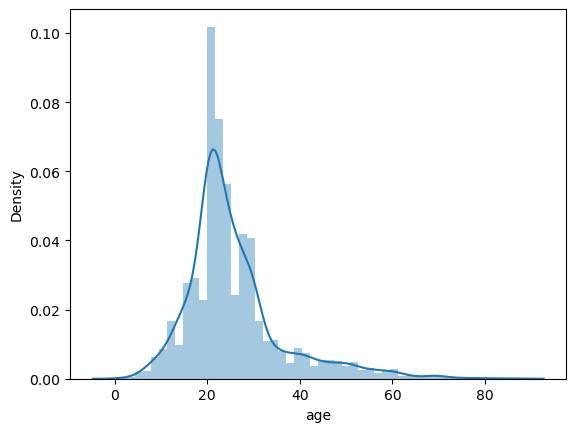

In [30]:
# Checking the distribution of age with recently added data

sns.distplot(data4["age"])

### activity

I decided to also keep the activity column because some activities can expose a victim to more dangerous or lethal scenarios. I find surfing, diving or swimming possible predictors for shark attacks and maybe for lethality.

This column was more tedious to clean. I saw there were a lot of different activities and I decided to classify them into 7 categories based on the amounts of values shown. Those categories were:
- swimming: with all activities including bathing, floating, but also jumping into the sea from cliffs
- fishing: mainly focused on boat fishing, but also some river fishing practices
- surfing: self-explanatory
- diving: with all activities including diving, snorkelling but also aquatic filming and photography,
- sea_activity: reassembling a miscellanea of recreational activities like kayak, paddleboard, and boating.
- beach_activity: reassembling a miscellanea of recreational activities like walking, playing or looking for shells or crabs.
- accident: self-explanatory

To achieve this goal I crafted a function to replace the values in the dataset with matched strings in a list using regular expressions. 
After that step, I simply replace each regular expression formula with the name of the wanted category.


In [31]:
data5 = data4.copy()

In [32]:
data5["activity"].value_counts()

activity
surfing                                                                                                                                                                                                                                                           933
swimming                                                                                                                                                                                                                                                          779
fishing                                                                                                                                                                                                                                                           412
spearfishing                                                                                                                                                                                                 

In [33]:
#Defining the function and the list with the regular expressions patterns to look for in diferent indexes for different categories

def extract_and_clean(data, column_name, words_list):
    extracted_values = {}
    for word in words_list:
        pattern = r'\b\w*{}\w*\b'.format(word)
        extracted_values[word] = data[column_name].apply(lambda x: re.findall(pattern, str(x)))
    series_variables = {}
    for word, values in extracted_values.items():
        series_variables[word] = pd.Series(values, name=word)
    for word, values in series_variables.items():
        series_variables[word] = values.apply(lambda x: x[0] if isinstance(x,list) & (len(x) >= 1) else None)
    indexes_object = {}
    for word, values in series_variables.items():
        indexes_object[word] = values.dropna().index.tolist()
    for word, indexes in indexes_object.items():
        data.loc[indexes, column_name] = word

    return series_variables, indexes_object, data

activities = ["(?:div|snork|photo|film)", "(?:net|fish|shrimp|catch|lobster)", "surf", "(?:swim|bath|float|jump|fell|lying)", "(?:boat|board|kaya|sail|canoe|paddl|row|scull|racing|ski|yacht)", "(?:wad|tread|walk|stand|ran|dang|splash|play|clamm|crouch|cruis|wash|sit|shell|crab|oyster)", "(?:disaster|wreck|ship|capsize|crash|sank|sink|sunk|adrift|rescue|lifesaving)"]

In [34]:
# Applying the function. This of course resulted in an iterative process of going back and forth but the implementation of the formula made it possible

activities_buckets = extract_and_clean(data5,"activity", activities)
data5["activity"].value_counts()

activity
(?:swim|bath|float|jump|fell|lying)                                                                                                                          1186
surf                                                                                                                                                         1064
(?:net|fish|shrimp|catch|lobster)                                                                                                                            1020
(?:wad|tread|walk|stand|ran|dang|splash|play|clamm|crouch|cruis|wash|sit|shell|crab|oyster)                                                                   561
(?:boat|board|kaya|sail|canoe|paddl|row|scull|racing|ski|yacht)                                                                                               548
(?:div|snork|photo|film)                                                                                                                                      498
(?:disaster|wreck|s

In [35]:
# Renaming matches with category names and assigning unspecified for category non-related values and missing values

def clean_activity(x):
    x = str(x)
    if x == "(?:swim|bath|float|jump|fell|lying)":
        return "swimming"
    elif x == "(?:net|fish|shrimp|catch|lobster)":
        return "fishing"
    elif x == "surf":
        return "surfing"
    elif x == "(?:div|snork|photo|film)":
        return "diving"
    elif x == "(?:boat|board|kaya|sail|canoe|paddl|row|scull|racing|ski|yacht)":
        return "sea_activity"
    elif x == "(?:wad|tread|walk|stand|ran|dang|splash|play|clamm|crouch|cruis|wash|sit|shell|crab|oyster)":
        return "beach_activity"
    elif x == "(?:disaster|wreck|ship|capsize|crash|sank|sink|sunk|adrift|rescue|lifesaving)":
        return "accident"
    else:
        return "unspecified"
    
data5["activity"] = data5["activity"].apply(clean_activity)
data5["activity"].value_counts()

activity
swimming          1186
surfing           1064
fishing           1020
unspecified        611
beach_activity     561
sea_activity       548
diving             498
accident           268
Name: count, dtype: int64

### injury

Of all the variables, I thought that the injury one would be the most important to predict fatal attacks.  

The column was utterly dirty showing a lot of different values with no order at all. I decided to use the same logic and function in activity to classify them into broader categories that could relate to lethality. 

I classified them into: hands or feet, limbs, torso, lower_torso, head, no_injury and fatal_unspecified.
Here there are a lot of maybe questionable decisions:

- In the first place, I decided to group all values with “fatal” into fatal_unspecified to drop it later from the model since the data was redundant with the target variable. 
- In the second place, I decided to include “minor injuries” and “major injuries” (and similar) into “hands_and_feet” and “torso” respectively. I intended to avoid a big unspecified value and I thought that since minor injuries would negatively correlate with lethality as “hands_of_feet” could potentially do I could safely cluster them. Same with "torso" and "major injuries"


In [36]:
data6 = data5.copy()

In [37]:
data6["injury"].value_counts()

injury
fatal                                                                                                                                                                                                                                          781
survived                                                                                                                                                                                                                                        93
foot_bitten                                                                                                                                                                                                                                     87
leg_bitten                                                                                                                                                                                                                                      70
no_injury            

In [38]:
injury = ["(?:head|cheek|neck|facial|face|jaw|tooth)", "(?:torso|abdomen|chest|hip|rib|back|major_injur|multiple_injur|serious|major|extensive|severe|multiple)", "(?:quadric|bicep|limb|arm|thigh|leg|knee|calf|elbow|shin|shoulder|extremities|calves)", "(?:thumb|hand|ankle|foot|feet|palm|heel|wrist|fing|minor_injur|toe|recovered|minor|survived)", "(?:butt|groin|penis)", "(?:no_injury|unharmed|unhurt|no_inury|not_injured)","(?:no_details|unknown|unspecified)", "(?:fatal|not_survived|no_survivors|perish)"]
injury_buckets = extract_and_clean(data6, "injury", injury)
data6["injury"].value_counts()

injury
(?:thumb|hand|ankle|foot|feet|palm|heel|wrist|fing|minor_injur|toe|recovered|minor|survived)                                                                                                                                               1774
(?:quadric|bicep|limb|arm|thigh|leg|knee|calf|elbow|shin|shoulder|extremities|calves)                                                                                                                                                      1436
(?:fatal|not_survived|no_survivors|perish)                                                                                                                                                                                                 1326
(?:no_injury|unharmed|unhurt|no_inury|not_injured)                                                                                                                                                                                          726
(?:torso|abdomen|chest|hip|rib|ba

In [39]:
def clean_injury(x):
    x = str(x)
    if x == "(?:thumb|hand|ankle|foot|feet|palm|heel|wrist|fing|minor_injur|toe|recovered|minor|survived)":
        return "hands_or_feet"
    elif x == "(?:quadric|bicep|limb|arm|thigh|leg|knee|calf|elbow|shin|shoulder|extremities|calves)":
        return "limbs"
    elif x == "(?:fatal|not_survived|no_survivors|perish)":
        return "fatal_unspecified"
    elif x == "(?:no_injury|unharmed|unhurt|no_inury|not_injured)":
        return "no_injury"
    elif x == "(?:torso|abdomen|chest|hip|rib|back|major_injur|multiple_injur|serious|major|extensive|severe|multiple)":
        return "torso"
    elif x == "(?:butt|groin|penis)":
        return "lower_torso"
    elif x == "(?:head|cheek|neck|facial|face|jaw|tooth)":
        return "head"
    else:
        return "unspecified"
    
data6["injury"] = data6["injury"].apply(clean_injury)
data6["injury"].value_counts()

injury
hands_or_feet        1774
limbs                1436
fatal_unspecified    1326
no_injury             726
unspecified           258
torso                 103
lower_torso            87
head                   46
Name: count, dtype: int64

### specie

I thought that the shark species could be one of the best predictors. It’s well known that there are more lethal species than others, like the great white shark or the tiger shark. Also, they are more aggressive and prone to attack species than others. 

In the same way that injury and activity, the dataset was chaotic. Some of the values showed species, others showed size and others were impossible to understand. There were more than 50% of missing values also. I was motivated to drop the column, but after an investigation into shark species, I decided to try to do a broader classification by size to try to group the maximum number of values possible.

Using the same formula and regular expressions for size measurements in meters and feet I classified all species into 3 categories: large, medium-sized and small.

I tried to learn by myself a way to do a random forest classification or some clustering to predict the missing values but in the end, I couldn't. 


In [40]:
data7 = data6.copy()

In [41]:
data7.head()

,year,country,area,location,age,sex,type,activity,time,injury,specie,fatal_(y/n)
0,2018.0,usa,california,"oceanside,_san_diego_county",57.0,female,boating,sea_activity,18h00,no_injury,white_shark,n
1,2018.0,usa,georgia,"st._simon_island,_glynn_county",11.0,female,unprovoked,beach_activity,14h00 -15h00,hands_or_feet,NaN,n
2,2018.0,usa,hawaii,"habush,_oahu",48.0,male,unprovoked,surfing,07h45,limbs,NaN,n
3,2018.0,australia,new_south_wales,arrawarra_headland,31.0,male,unprovoked,surfing,NaN,hands_or_feet,2_m_shark,n
4,2018.0,mexico,colima,la_ticla,31.0,male,provoked,diving,NaN,hands_or_feet,"tiger_shark,_3m",n


In [42]:
data7.isna().sum()

year              0
country          45
area            403
location        481
age               0
sex               0
type              0
activity          0
time           2954
injury            0
specie         2809
fatal_(y/n)       0
dtype: int64

In [43]:
species = ["(?:whale|basking|greenland|large|tiger|(?:11(?:\.\d+)?'|[4-9](?:\.\d+)?_?m|\d{2,}\.\d+m?))", "(?:white|bull|silky|dusky|sand|copper|galapagos|spinner|blue|porbeagle|thresher|mako|(?:[3-9](?:\.\d+)?'|10(?:\.[0-8]\d*)?'|[0-2]?\.\d{1,2}_?m|3(\.[0-2]\d*)?_?m))", "(?:hammer|zambesi|leopard|soup|sixgill|seven|horn|nurse|angel|wobbegong|carpet|zebra|grey|reef|silvertip|blacktip|cookie|dog|salmon|whitetip|lemon|silky|ragged|caribbean|shovel|sleeper|juvenile|young|small|(?:[0-2](?:\.\d+)?'|[0-2]?\.?\d{1,2}_?m))"]
specie_buckets = extract_and_clean(data7, "specie", species)
data7.specie.value_counts()

specie
(?:hammer|zambesi|leopard|soup|sixgill|seven|horn|nurse|angel|wobbegong|carpet|zebra|grey|reef|silvertip|blacktip|cookie|dog|salmon|whitetip|lemon|silky|ragged|caribbean|shovel|sleeper|juvenile|young|small|(?:[0-2](?:\.\d+)?'|[0-2]?\.?\d{1,2}_?m))    1852
(?:white|bull|silky|dusky|sand|copper|galapagos|spinner|blue|porbeagle|thresher|mako|(?:[3-9](?:\.\d+)?'|10(?:\.[0-8]\d*)?'|[0-2]?\.\d{1,2}_?m|3(\.[0-2]\d*)?_?m))                                                                                          799
(?:whale|basking|greenland|large|tiger|(?:11(?:\.\d+)?'|[4-9](?:\.\d+)?_?m|\d{2,}\.\d+m?))                                                                                                                                                                  156
shark_involvement_not_confirmed                                                                                                                                                                                                  

In [44]:
def clean_specie(x):
    x = str(x)
    if x == "(?:hammer|zambesi|leopard|soup|sixgill|seven|horn|nurse|angel|wobbegong|carpet|zebra|grey|reef|silvertip|blacktip|cookie|dog|salmon|whitetip|lemon|silky|ragged|caribbean|shovel|sleeper|juvenile|young|small|(?:[0-2](?:\.\d+)?'|[0-2]?\.?\d{1,2}_?m))":
        return "small_shark"
    elif x == "(?:white|bull|silky|dusky|sand|copper|galapagos|spinner|blue|porbeagle|thresher|mako|(?:[3-9](?:\.\d+)?'|10(?:\.[0-8]\d*)?'|[0-2]?\.\d{1,2}_?m|3(\.[0-2]\d*)?_?m))":
        return "medium_size_shark"
    elif x == "(?:whale|basking|greenland|large|tiger|(?:11(?:\.\d+)?'|[4-9](?:\.\d+)?_?m|\d{2,}\.\d+m?))":
        return "large_shark"
    else:
        return "unspecified"
    
data7["specie"] = data7["specie"].apply(clean_specie)
data7["specie"].value_counts()

specie
unspecified          2949
small_shark          1852
medium_size_shark     799
large_shark           156
Name: count, dtype: int64

### risk_zone

In the first place, I thought that the area, country or location couldn’t be great predictors for lethality. The column was filled with different values and some of them didn't relate to country, or were too broad. 

I decided to feature engineer 4 categories based on an arbitrary classification of lethality ratios. 

After designing a function that calculates the ratio of lethality in those countries with more than 4 shark accidents (and assigns to 0.0 the ones with less than four) and classifies them based on the ratio using conditionals, i renamed those countries with the corresponding category. 

A small amount of missing values will coalesce with the biggest category.


In [45]:
# Here i leverage the copy to drop the time column because of the great amount of missing values.

data7 = data7.drop(columns=["time"])
data8 = data7.copy()

In [46]:
data8.head()

,year,country,area,location,age,sex,type,activity,injury,specie,fatal_(y/n)
0,2018.0,usa,california,"oceanside,_san_diego_county",57.0,female,boating,sea_activity,no_injury,medium_size_shark,n
1,2018.0,usa,georgia,"st._simon_island,_glynn_county",11.0,female,unprovoked,beach_activity,hands_or_feet,unspecified,n
2,2018.0,usa,hawaii,"habush,_oahu",48.0,male,unprovoked,surfing,limbs,unspecified,n
3,2018.0,australia,new_south_wales,arrawarra_headland,31.0,male,unprovoked,surfing,hands_or_feet,small_shark,n
4,2018.0,mexico,colima,la_ticla,31.0,male,provoked,diving,hands_or_feet,small_shark,n


In [47]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5756 entries, 0 to 6301
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         5756 non-null   float64
 1   country      5711 non-null   object 
 2   area         5353 non-null   object 
 3   location     5275 non-null   object 
 4   age          5756 non-null   float64
 5   sex          5756 non-null   object 
 6   type         5756 non-null   object 
 7   activity     5756 non-null   object 
 8   injury       5756 non-null   object 
 9   specie       5756 non-null   object 
 10  fatal_(y/n)  5756 non-null   object 
dtypes: float64(2), object(9)
memory usage: 668.7+ KB


In [48]:
data8["country"].value_counts()


country
usa                                      2039
australia                                1224
south_africa                              515
papua_new_guinea                          132
new_zealand                               116
brazil                                    104
bahamas                                   104
mexico                                     78
fiji                                       64
reunion                                    60
italy                                      57
philippines                                57
new_caledonia                              52
cuba                                       42
mozambique                                 41
india                                      38
egypt                                      35
spain                                      34
panama                                     31
solomon_islands                            30
japan                                      28
iran                      

In [49]:
def classify_lethality(data):
    counts = data8['country'].value_counts()
    fatalities = data8[data8['fatal_(y/n)'] == 'y']['country'].value_counts()
    
    ratios = {}
    for country, count in counts.items():
        if (country in fatalities) & (count >= 4):
            fatality_count = fatalities[country]
            fatality_ratio = fatality_count / count
            ratios[country] = fatality_ratio
        else:
            ratios[country] = 0.0  
    
    
    high_lethality_ratio = []
    moderate_lethality_ratio = []
    low_moderate_lethality_ratio = []
    low_lethality_ratio = []
    
    for country, ratio in ratios.items():
        if ratio >= 0.75:
            high_lethality_ratio.append(country)
        elif 0.5 <= ratio < 0.75:
            moderate_lethality_ratio.append(country)
        elif 0.25 <= ratio < 0.5:
            low_moderate_lethality_ratio.append(country)
        else:
            low_lethality_ratio.append(country)
    
    return high_lethality_ratio, moderate_lethality_ratio, low_moderate_lethality_ratio, low_lethality_ratio

high_lethality_ratio, moderate_lethality_ratio, low_moderate_lethality_ratio,  low_lethality_ratio = classify_lethality(data8)
print(high_lethality_ratio)
print(moderate_lethality_ratio)
print(low_moderate_lethality_ratio)
print(low_lethality_ratio)

['greece', 'south_korea', 'yemen_', 'nicaragua', 'somalia', 'grenada', 'burma', 'nigeria']
['mexico', 'philippines', 'cuba', 'india', 'panama', 'croatia', 'hong_kong', 'jamaica', 'indonesia', 'pacific_ocean', 'atlantic_ocean', 'costa_rica', 'vanuatu', 'kenya', 'new_guinea', 'sierra_leone', 'chile', 'dominican_republic', 'tanzania', 'caribbean_sea', 'seychelles', 'madagascar', 'okinawa', 'new_britain', 'singapore', 'kiribati', 'china', 'barbados', 'libya', 'indian_ocean', 'malta', 'el_salvador', 'uruguay']
['papua_new_guinea', 'brazil', 'fiji', 'reunion', 'new_caledonia', 'mozambique', 'egypt', 'solomon_islands', 'japan', 'iran', 'tonga', 'iraq', 'south_atlantic_ocean', 'canada', 'venezuela', 'france', 'turkey', 'mauritius', 'taiwan', 'senegal', 'thailand', 'north_pacific_ocean', 'mid_atlantic_ocean', 'turks_&_caicos', 'saudi_arabia', 'sudan', 'persian_gulf']
['usa', 'australia', 'south_africa', 'new_zealand', 'bahamas', 'italy', 'spain', 'french_polynesia', 'england', 'vietnam', 'bermu

In [50]:
def risk_zone(x):
    if str(x) in high_lethality_ratio:
        return "high_risk_zone"
    elif str(x) in moderate_lethality_ratio:
        return "moderate_risk_zone"
    elif str(x) in low_moderate_lethality_ratio:
        return "low_moderate_risk_zone"
    else:
        return "low_risk_zone"

data8["country"] = data8["country"].apply(risk_zone)
data8 = data8.rename(columns={"country":"risk_zone"})
data8.risk_zone.value_counts()

risk_zone
low_risk_zone             4445
low_moderate_risk_zone     719
moderate_risk_zone         535
high_risk_zone              57
Name: count, dtype: int64

### area

Finally to add some extra information i left the area column. I clustered the areas with less than 30 accidents (again an arbitrary range) in an “other” category. 

In [51]:
data9 = data8.copy()
data9.head()

,year,risk_zone,area,location,age,sex,type,activity,injury,specie,fatal_(y/n)
0,2018.0,low_risk_zone,california,"oceanside,_san_diego_county",57.0,female,boating,sea_activity,no_injury,medium_size_shark,n
1,2018.0,low_risk_zone,georgia,"st._simon_island,_glynn_county",11.0,female,unprovoked,beach_activity,hands_or_feet,unspecified,n
2,2018.0,low_risk_zone,hawaii,"habush,_oahu",48.0,male,unprovoked,surfing,limbs,unspecified,n
3,2018.0,low_risk_zone,new_south_wales,arrawarra_headland,31.0,male,unprovoked,surfing,hands_or_feet,small_shark,n
4,2018.0,moderate_risk_zone,colima,la_ticla,31.0,male,provoked,diving,hands_or_feet,small_shark,n


In [52]:
low_area = [i for i, val in data9["area"].value_counts().items() if val < 30]
data9["area"] = data9["area"].apply(lambda x: "other" if x in low_area else x)
data9 = data9.drop(columns=["location"])
data9["area"] = data9["area"].fillna("other")
data9.isna().sum()

year           0
risk_zone      0
area           0
age            0
sex            0
type           0
activity       0
injury         0
specie         0
fatal_(y/n)    0
dtype: int64

# Exploratory Data Analysis

In [53]:
df = data9.copy()
df.head()

,year,risk_zone,area,age,sex,type,activity,injury,specie,fatal_(y/n)
0,2018.0,low_risk_zone,california,57.0,female,boating,sea_activity,no_injury,medium_size_shark,n
1,2018.0,low_risk_zone,other,11.0,female,unprovoked,beach_activity,hands_or_feet,unspecified,n
2,2018.0,low_risk_zone,hawaii,48.0,male,unprovoked,surfing,limbs,unspecified,n
3,2018.0,low_risk_zone,new_south_wales,31.0,male,unprovoked,surfing,hands_or_feet,small_shark,n
4,2018.0,moderate_risk_zone,other,31.0,male,provoked,diving,hands_or_feet,small_shark,n


### Checking numerical variables distribution and checking for outliers

During the numeric variables check phase, I examined the distribution to identify any outliers. I found that the majority of values for "age" fall within the range of 10 to 40 years, while outliers are dispersed across the entire spectrum. Concerning the years, the outliers refer to records dating back to years prior to a thousand, likely originating from historical texts. The majority of values are distributed within the last century.

In [54]:
# Summary of descriptive statistics for numerical values

df.describe()

,year,age
count,5756.000000,5756.000000
mean,1965.650278,25.706567
std,74.866121,10.698355
min,5.000000,1.000000
25%,1945.000000,20.000000
50%,1980.000000,23.000000
75%,2005.000000,29.000000
max,2018.000000,87.000000


<Axes: xlabel='age'>

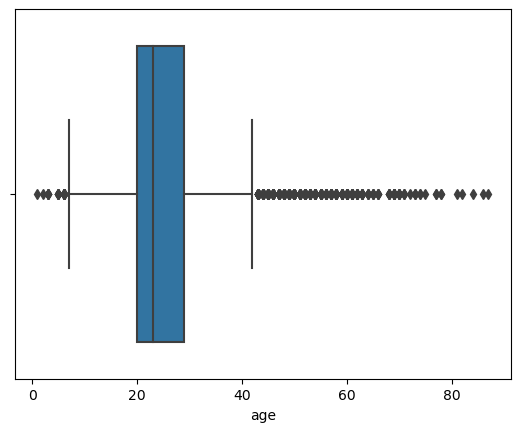

In [55]:
sns.boxplot(data=df, x="age")

<Axes: xlabel='year'>

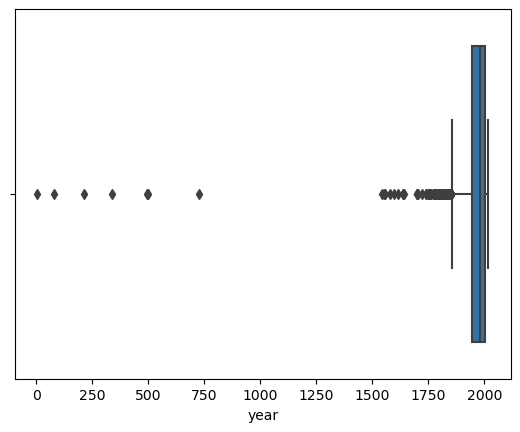

In [56]:
sns.boxplot(data=df, x="year")

### Plotting in relation with fatal_(y/n)

In the subsequent phase, I generated several graphs focusing on examining the relationship between various predictors and the dependent variable.

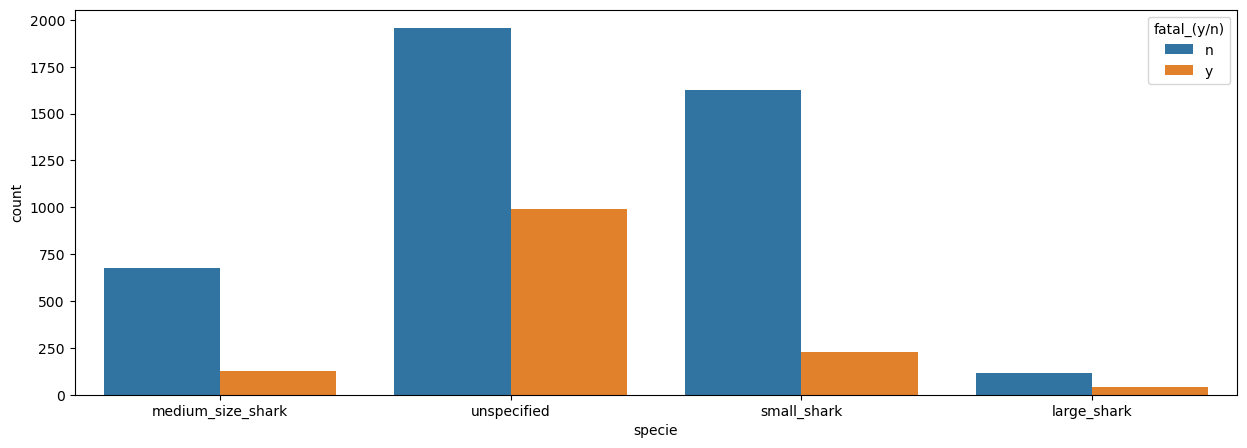

In [57]:
# Relation between fatality and the size of the shark

plt.figure(figsize=(15,5))

sns.countplot(x="specie", hue='fatal_(y/n)', data=df)
plt.show()

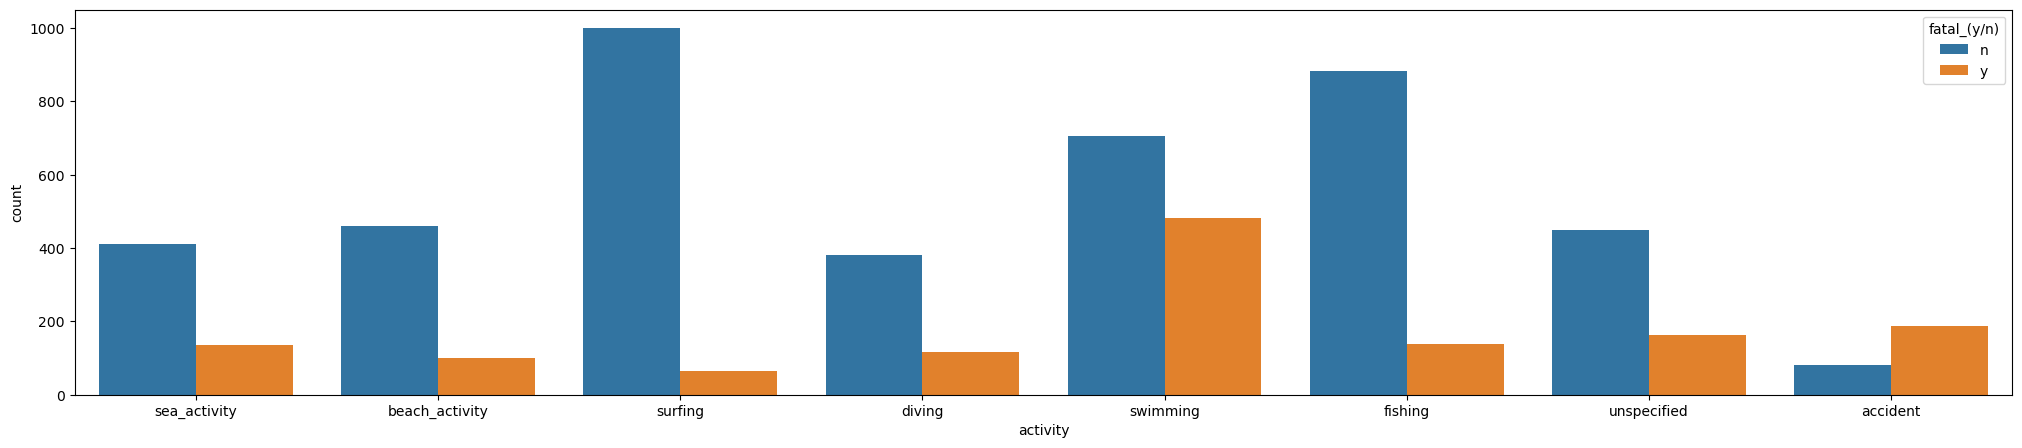

In [86]:
# Relation between activity and fatality

plt.figure(figsize=(25,5))

sns.countplot(x="activity", hue='fatal_(y/n)', data=df)
plt.show()

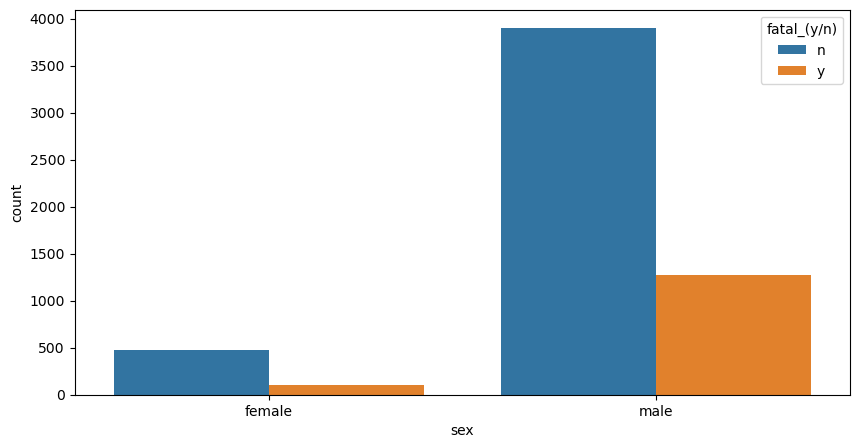

In [84]:
#Relation between fatality and sex

plt.figure(figsize=(10,5))

sns.countplot(x="sex", hue='fatal_(y/n)', data=df)
plt.show()

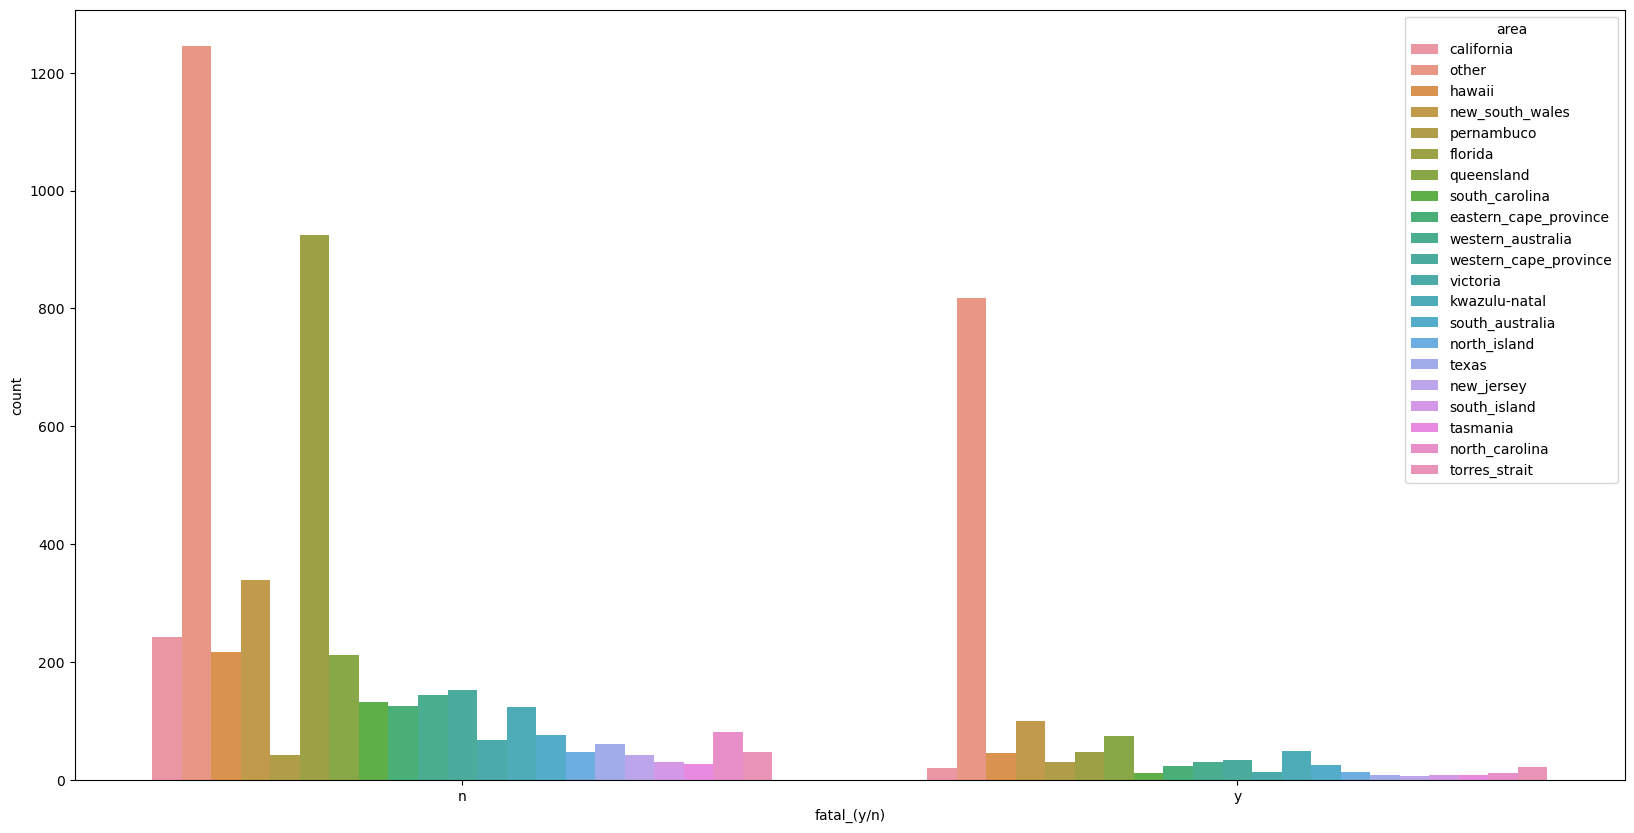

In [83]:
# Relation between fatality and area

plt.figure(figsize=(20,10))

sns.countplot(x="fatal_(y/n)", hue='area', data=df)
plt.show()

# Implementing the model

In the following phase, I preprocessed the dataset to conduct a correlation study aiming to better comprehend the relationship between each variable and the fatality of a potential shark attack. 

Lastly, I performed the train-test split to implement scaling, followed by the logistic regression model.

### Encoding the dataframe

During the encoding phase, I isolated the categorical variables from the dataset and applied OneHotEncoder to convert the data into a binary format. 

Finally, upon completing the dataset, I decided to export it before continuing with the study.







In [60]:
# Separating categorical and numerical data

df_to_encode = df.copy()
cat_df = df_to_encode.select_dtypes("object")
num_df = df_to_encode.select_dtypes("number")
display(cat_df.head())
display(num_df.head())

,risk_zone,area,sex,type,activity,injury,specie,fatal_(y/n)
0,low_risk_zone,california,female,boating,sea_activity,no_injury,medium_size_shark,n
1,low_risk_zone,other,female,unprovoked,beach_activity,hands_or_feet,unspecified,n
2,low_risk_zone,hawaii,male,unprovoked,surfing,limbs,unspecified,n
3,low_risk_zone,new_south_wales,male,unprovoked,surfing,hands_or_feet,small_shark,n
4,moderate_risk_zone,other,male,provoked,diving,hands_or_feet,small_shark,n


,year,age
0,2018.0,57.0
1,2018.0,11.0
2,2018.0,48.0
3,2018.0,31.0
4,2018.0,31.0


In [61]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)

In [62]:
#Fitting the encoder into the categorical data

encoder = OneHotEncoder()
encoder.fit(cat_df)

OneHotEncoder()

In [63]:
# Transforming the data into binary format

matrix = encoder.transform(cat_df).todense()
matrix

matrix([[0., 0., 1., ..., 0., 1., 0.],
        [0., 0., 1., ..., 1., 1., 0.],
        [0., 0., 1., ..., 1., 1., 0.],
        ...,
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 1., ..., 1., 0., 1.]])

In [64]:
encoder.categories_[:][:]

[array(['high_risk_zone', 'low_moderate_risk_zone', 'low_risk_zone',
        'moderate_risk_zone'], dtype=object),
 array(['california', 'eastern_cape_province', 'florida', 'hawaii',
        'kwazulu-natal', 'new_jersey', 'new_south_wales', 'north_carolina',
        'north_island', 'other', 'pernambuco', 'queensland',
        'south_australia', 'south_carolina', 'south_island', 'tasmania',
        'texas', 'torres_strait', 'victoria', 'western_australia',
        'western_cape_province'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['boating', 'provoked', 'sea_disaster', 'unprovoked'], dtype=object),
 array(['accident', 'beach_activity', 'diving', 'fishing', 'sea_activity',
        'surfing', 'swimming', 'unspecified'], dtype=object),
 array(['fatal_unspecified', 'hands_or_feet', 'head', 'limbs',
        'lower_torso', 'no_injury', 'torso', 'unspecified'], dtype=object),
 array(['large_shark', 'medium_size_shark', 'small_shark', 'unspecified'],
       dtype=object),

In [65]:
# To assemble the final dataframe i need a series with the name of the columns

columns = []

for i in range(len(encoder.categories_[:])):
    columns += list(encoder.categories_[i])[:]
print(columns)
print(len(columns))

['high_risk_zone', 'low_moderate_risk_zone', 'low_risk_zone', 'moderate_risk_zone', 'california', 'eastern_cape_province', 'florida', 'hawaii', 'kwazulu-natal', 'new_jersey', 'new_south_wales', 'north_carolina', 'north_island', 'other', 'pernambuco', 'queensland', 'south_australia', 'south_carolina', 'south_island', 'tasmania', 'texas', 'torres_strait', 'victoria', 'western_australia', 'western_cape_province', 'female', 'male', 'boating', 'provoked', 'sea_disaster', 'unprovoked', 'accident', 'beach_activity', 'diving', 'fishing', 'sea_activity', 'surfing', 'swimming', 'unspecified', 'fatal_unspecified', 'hands_or_feet', 'head', 'limbs', 'lower_torso', 'no_injury', 'torso', 'unspecified', 'large_shark', 'medium_size_shark', 'small_shark', 'unspecified', 'n', 'y']
53


In [66]:
# Assembling data to the columns 

cat_df = pd.DataFrame(matrix, columns=columns)
cat_df.shape

(5756, 53)

In [67]:
# Adding the numerical columns to the final dataframe

final_df = cat_df
final_df["year"] = num_df["year"].values
final_df["age"] = num_df["age"].values
final_df.head()

,high_risk_zone,low_moderate_risk_zone,low_risk_zone,moderate_risk_zone,california,eastern_cape_province,florida,hawaii,kwazulu-natal,new_jersey,new_south_wales,north_carolina,north_island,other,pernambuco,queensland,south_australia,south_carolina,south_island,tasmania,texas,torres_strait,victoria,western_australia,western_cape_province,female,male,boating,provoked,sea_disaster,unprovoked,accident,beach_activity,diving,fishing,sea_activity,surfing,swimming,unspecified,fatal_unspecified,hands_or_feet,head,limbs,lower_torso,no_injury,torso,unspecified,large_shark,medium_size_shark,small_shark,unspecified,n,y,year,age
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2018.0,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2018.0,11.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2018.0,48.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2018.0,31.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2018.0,31.0


In [68]:
#Exporting the dataset

final_df.to_csv("final_df_angel.csv")

### Checking for correlations


In the subsequent phase, after creating a correlation matrix with the data related to the dependent variable, I proceeded to organize this data to observe the potential main positive and negative predictor variables. 

- I observed that the variable "fatal_unspecified" from the injuries column showed nearly maximum correlation, as I anticipated. 
- However, the relationship between the clusters of "risk zones" didn't entirely fit as expected, yet it somewhat fulfilled its purpose by demonstrating negative correlations in low-risk zones. 
- Lastly, other factors such as the locations of injuries during attacks on hands, legs, and limbs exhibited negative correlations.

Subsequently, I represented these coefficients on a heatmap to provide a visual overview of these relationships at a glance.

In [69]:
final_corr_matrix = final_df.corr()
final_corr_matrix["y"].sort_values(ascending=False)

y                         1.000000
fatal_unspecified         0.966140
other                     0.271962
moderate_risk_zone        0.260731
accident                  0.238258
unspecified               0.229634
sea_disaster              0.228908
swimming                  0.196577
low_moderate_risk_zone    0.130299
high_risk_zone            0.124306
unprovoked                0.079932
pernambuco                0.045078
male                      0.043669
torres_strait             0.021208
unspecified               0.021088
kwazulu-natal             0.015787
large_shark               0.013675
queensland                0.009694
sea_activity              0.005734
south_australia           0.002918
tasmania                 -0.005062
diving                   -0.005534
north_island             -0.005751
south_island             -0.008570
new_south_wales          -0.009796
victoria                 -0.022394
new_jersey               -0.023977
western_cape_province    -0.026534
western_australia   

<Axes: >

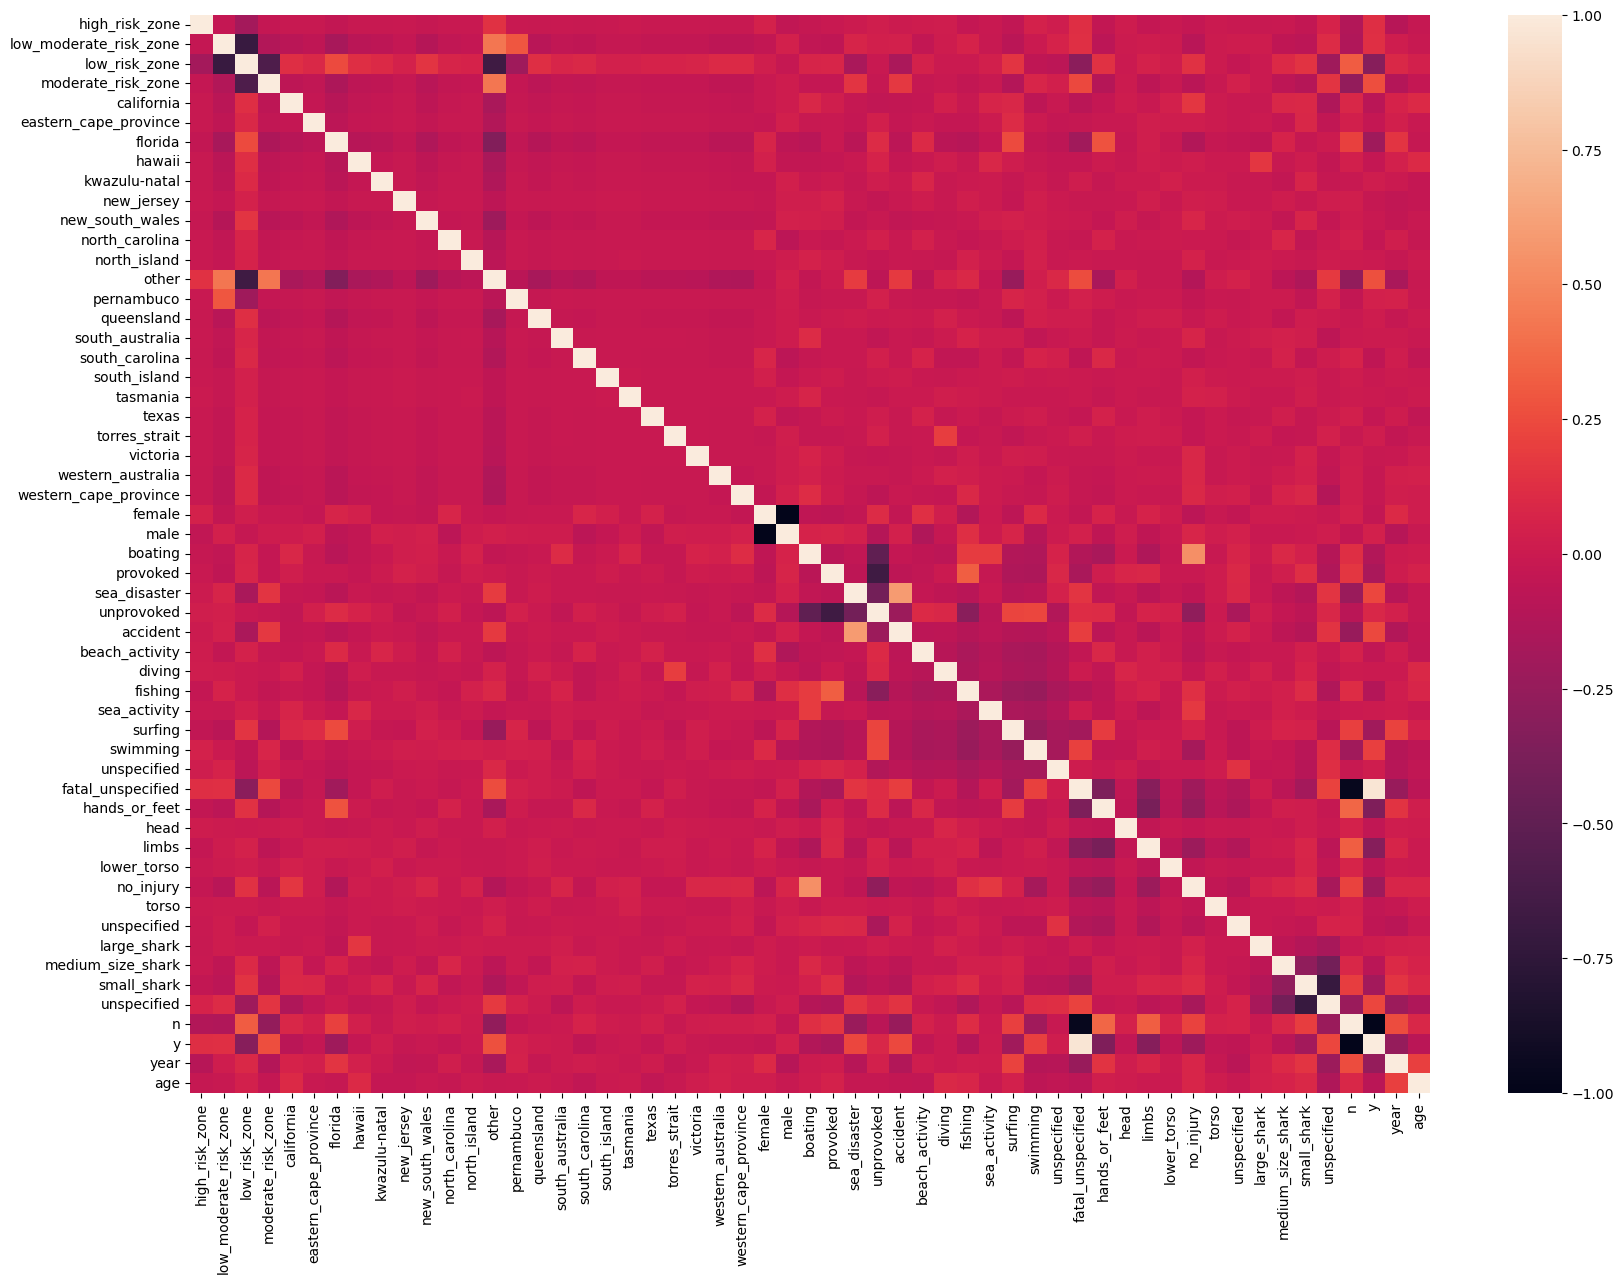

In [70]:
plt.figure(figsize=(20,14))
sns.heatmap(final_corr_matrix)

### Splitting the data and Scaling

During the train test splitting phase, I partitioned the dataset into the necessary segments and applied a provisional scaler. 

In this partition, I excluded the column "fatal_unspecified" from the independent variable.

I decided to allocate a testing ratio of 0.3 for the model to prevent it from being excessively high, aiming to avoid overfitting.

In [71]:
X = final_df.drop(["y", "n", "fatal_unspecified"], axis=1)
y = final_df["y"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [74]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Implementation


Finally, after implementing the model, I observed the following results:

- The model exhibited a high capability to correctly predict false data. This was likely due to a significant imbalance in the results.
- There was a very low score for both false positives and false negatives in the model.

In conclusion, while I'm uncertain if it's overfitting, I believe it serves as a solid starting point for introducing improvements in the group phase.

In [75]:
# Fitting the model

classification = LogisticRegression(random_state=42)
classification.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [76]:
# Doing predictions

predictions = classification.predict(X_test_scaled)
predictions

array([0., 0., 1., ..., 0., 0., 0.])

In [77]:
y_test.value_counts()

y
0.0    1317
1.0     410
Name: count, dtype: int64

In [79]:
# Checking the confusion matrix metric

cm = confusion_matrix(y_test, predictions)
cm

array([[1306,   11],
       [  12,  398]], dtype=int64)

<Axes: >

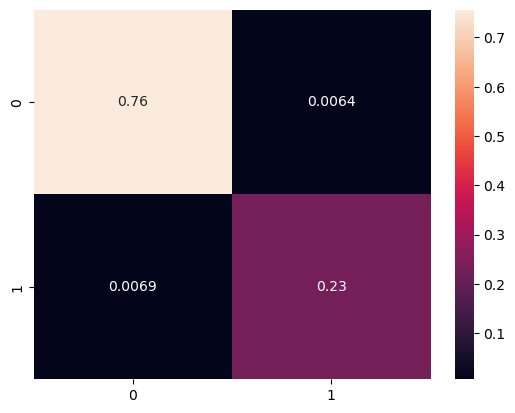

In [80]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True)